## Qual o tempo médio de atendimento por tipo de solicitação requisitada?

Para analisarmos esse questionamento, iremos retirar o tempo respectivo a diferença entre a _Data da demanda_ e a _Data da ultima situação_, por fim podemos realizar o agrupamento dos intervalos por pela _descrição do serviço_, obtendo ao final a média dos intervalos de tempo para cada tipo requisitado.

### Importando bibliotecas

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline  

### Carregando arquivo de análise (dados das solicitações)

In [24]:
df = pd.read_hdf('../../data/processed/solicitacoes156.h5', key='data', format="table")
df.head()

,GRUPOSERVICO_CODIGO,GRUPOSERVICO_DESCRICAO,SERVICO_CODIGO,SERVICO_DESCRICAO,LOGRADOURO,NUMERO,BAIRRO,RPA,DATA_DEMANDA,SITUACAO,DATA_ULT_SITUACAO,ANO
0,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,1TR PIRIZAL,3587,VASCO DA GAMA,3,2012-05-03,ATENDIDA,2012-05-03,2012
1,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,1TR SEBASTIAO GRANDE,3587,AREIAS,5,2012-05-10,ATENDIDA,2012-05-10,2012
2,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV ANTONIO DE GOES,3578,PINA,6,2012-05-11,ATENDIDA,2012-05-11,2012
3,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV BEBERIBE,00,AGUA FRIA,2,2012-09-12,ATENDIDA,2012-09-12,2012
4,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV BEIRA RIO,00,MADALENA,4,2012-08-10,ATENDIDA,2012-08-10,2012


### Processando intervalos de tempo e agrupamento de dados

In [70]:
df['INTERVALO'] = df['DATA_ULT_SITUACAO'] - df['DATA_DEMANDA']
df['INTERVALO'] = df['INTERVALO'].apply(lambda x: x.days)
group_df = df.groupby('SERVICO_DESCRICAO')[['INTERVALO']]

### Visualização de dados

In [71]:
group_df.mean()

,INTERVALO
SERVICO_DESCRICAO,
ACAO EDUC. E INFORMATIVA,13.246753
ACENDER CIRCUITO,2.712603
APAGAR CIRCUITO,3.624000
APAGAR LAMPADA,3.877972
AVAL. INST. DE CESTAS DE LIXO,17.200000
CAPINACAO DE PRACAS AREAS VERD,105.000000
CAPINACAO EM LOGRADOUROS,30.149276
CAPINACAO EM VIA PAVIMENTADA,24.768730
COBRANCAS E TAXAS IRREGULARES,0.000000


### Estudo da media de intervalos para execução da solicitação

Tempo médio geral para atender uma solicitação: 25 dias

Serviços que são atendidos no mesmo dia da solitação em média:
	SEPULT.EM COVA ADULTO
	SEPULT.EM COVA INFANTIL
	SEPULT.EM GAVETA ADULTO
	SEPULT.EM JASIDUO
	COBRANCAS E TAXAS IRREGULARES
	EXUMACAO
	TUMULO DE FAMILIA
	VELORIO POPULAR
	VELORIO PRINCIPAL
	LEVANTAMENTO TOPOGRAFICO

Tempo médio por tipo de serviço solicitado:


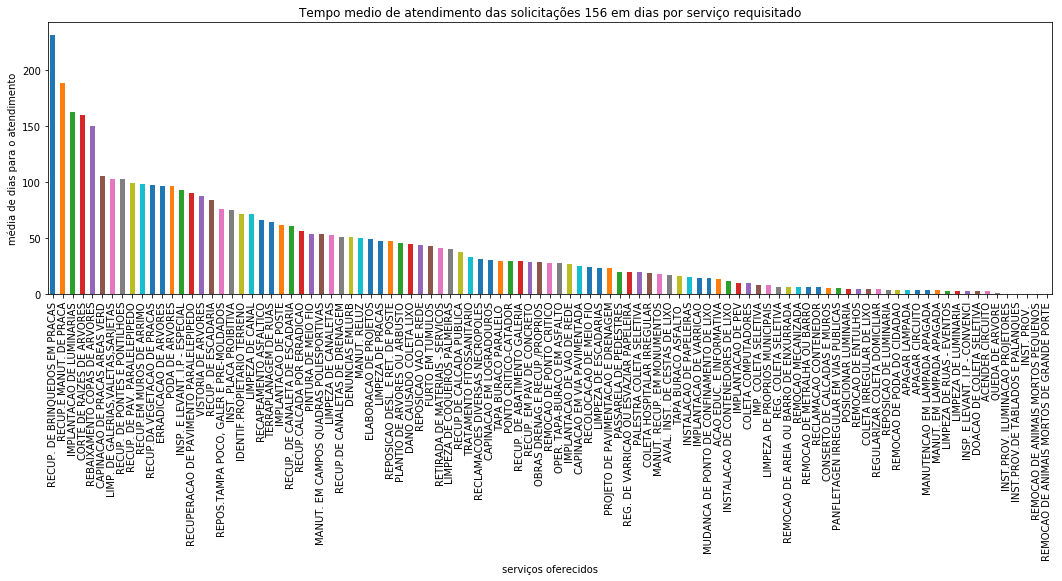

In [75]:
print('Tempo médio geral para atender uma solicitação:', int(round(df['INTERVALO'].mean())), 'dias')

group_sorted = group_df.mean().sort_values(by=['INTERVALO'], ascending=False)
group_sorted_nozero = group_sorted[group_sorted['INTERVALO'] != 0]
group_sorted_iszero = group_sorted[group_sorted['INTERVALO'] == 0]

print('\nServiços que são atendidos no mesmo dia da solitação em média:')
for service in group_sorted_iszero['INTERVALO'].index:
    print('\t' + service)

axis = group_sorted_nozero.plot.bar(
    x=None, 
    y='INTERVALO', 
    figsize=(18, 5), 
    legend=False,
    title='Tempo médio de atendimento das solicitações 156 em dias por serviço requisitado')
axis.set_ylabel('média de dias para o atendimento')
axis.set_xlabel('serviços oferecidos')
print('\nTempo médio por tipo de serviço solicitado:')

### Estudo do desvio padrão sobre o intervalo de tempo para concluir uma solicitação

Variação do tempo geral para atender uma solicitação: 93 dias

Desvio padrão (variação) de tempo de atendimento por tipo de serviço solicitado:


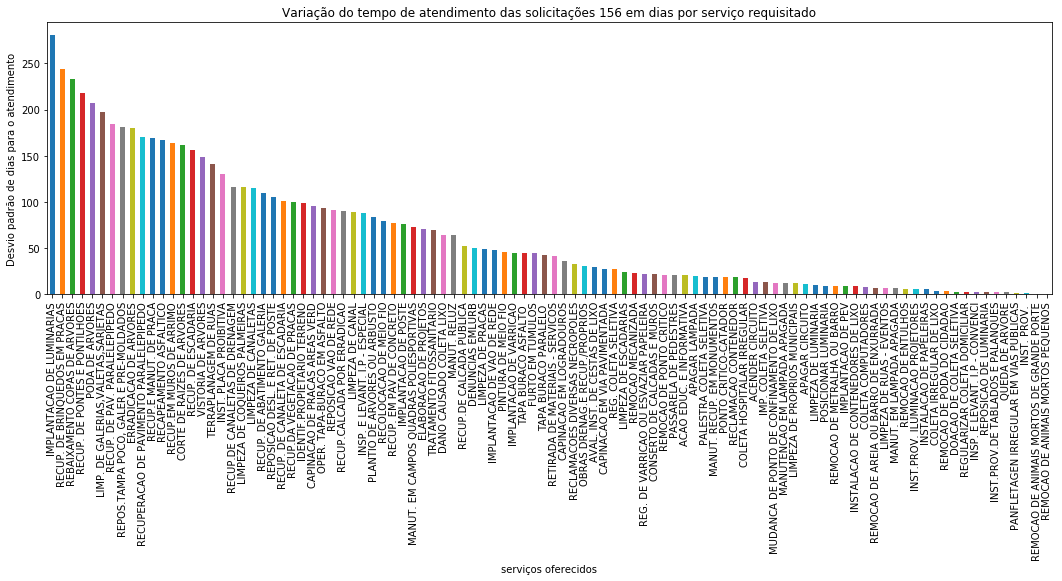

In [143]:
print('Variação do tempo geral para atender uma solicitação:', int(round(df['INTERVALO'].std())), 'dias')

group_sorted = group_df.std().sort_values(by=['INTERVALO'], ascending=False)
group_sorted_nozero = group_sorted[group_sorted['INTERVALO'] != 0]
group_sorted_iszero = group_sorted[group_sorted['INTERVALO'] == 0]

axis = group_sorted_nozero.plot.bar(
    x=None, 
    y='INTERVALO', 
    figsize=(18, 5), 
    legend=False,
    title='Variação do tempo de atendimento das solicitações 156 em dias por serviço requisitado')
axis.set_ylabel('Desvio padrão de dias para o atendimento')
axis.set_xlabel('serviços oferecidos')
print('\nDesvio padrão (variação) de tempo de atendimento por tipo de serviço solicitado:')

## Estudo da distribuição do tempo de atendimento

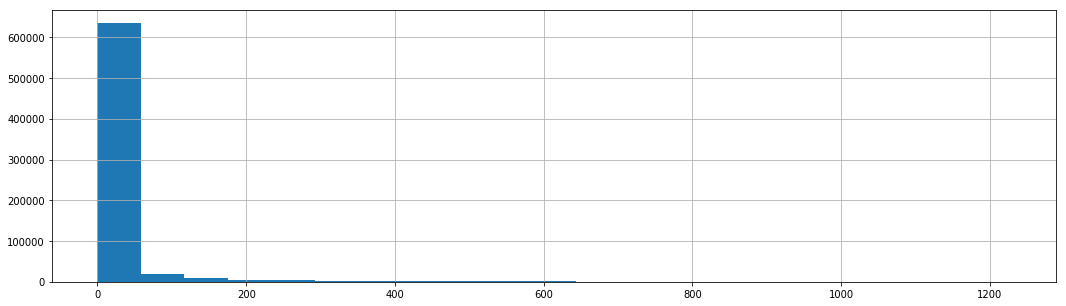

In [89]:
import math

# Número de bins pela formula de sturges: ceil(log2(N) + 1)
bins = math.ceil(math.log2(df['INTERVALO'].shape[0]) + 1)
axis = df['INTERVALO'].hist(figsize=(18, 5), bins=bins)

Distribuição dos tempos de atendimento respectivos a cada tipo de solicitação:


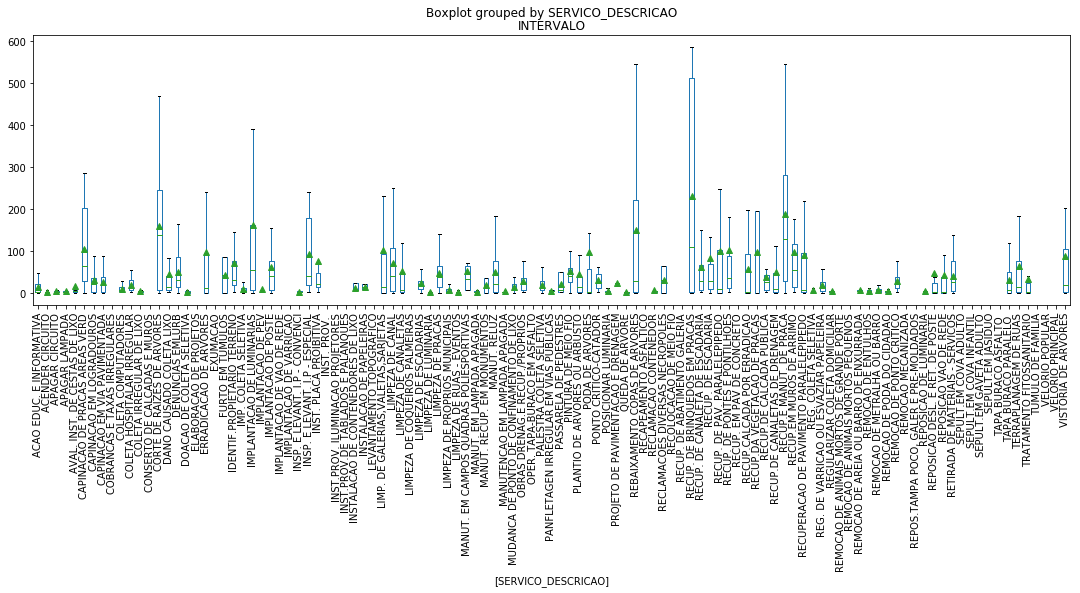

In [145]:
medians = group_df.median()
medians = medians[medians['INTERVALO'] != 0].index
filtered_df = df[['SERVICO_DESCRICAO', 'INTERVALO']][df['SERVICO_DESCRICAO'].isin(medians)]

filtered_df.boxplot(
    by='SERVICO_DESCRICAO',
    showfliers=False,
    figsize=(18, 5),
    showmeans=True,
    grid=False,
    rot=90)

print('Distribuição dos tempos de atendimento respectivos a cada tipo de solicitação:')

### Conclusões

**Qual o tempo médio de atendimento por tipo de solicitação requisitada?**

O tempo médio geral para realizar um atendimento é de 25 dias, serviços como: recuperação de praças, brinquendo, instalação de luminarias e poda de copas de árvores, em média tomam mais tempo, cerca de 150 dias ou mais. Já serviços como: remoção de animais mortos e remoção de árvores caidas tendem a ter atendimento rápido, cerca de 2 dias ou menos. Alguns serviços demotraram comportamente inusitado, sendo atendidos no mesmo dia em que foi requisitado na média, alguns são: cobranças de taxas irregulares, exumação, velório e levantamento topográfico.

O tempo para execução de um atendimento pode variar em cerca de 93 dias para mais ou para menos. alguns serviços como: recuperação de praças, brinquendo, instalação de luminarias e poda de copas de árvores, podem variar cerca de 200 dias para mais ou menos. Já os serviços mais rápidos, como: remoção de animais mortos e remoção de árvores caidas, possui variação baixa, cerca de 1 dia ou menos.

A distribuição dos intervalos indica que normalmente as solicitações são atendidas nos primeiros 50 dias desde sua requisição, isso é confirmado pelo gráfico de boxplot que normalmente possui valores de medias e medianas baixos, com releção aos valores maximais de cada distribuição.